In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1(a):
Use forward Euler method to solve $$y^\prime=-5y, \quad y(0)=1.$$ Solve the problem for $t\in[0, 10]$ with $h=0.4$, $h=0.41$ and $h=0.1$.

Forward Euler method gives us that 
$$u_{n+1} = u_n + hf(t_n, u_n).$$
In this question that is
$$u_{n+1} = u_n -5hu_n = (1-5h)u_n.$$
where we are given the initial $u_0 = 1$, then for different value $h$, we have $$h=0.4 \Rightarrow u_{n+1} = -u_n ,\quad h = 0.41 \Rightarrow u_{n=1} = -1.05u_n \text{ and } h=0.1 \Rightarrow u_{n+1} = 0.5u_n$$

Therefore, we can observe that only when $h=0.1$, the solution will converge.

Max error for h=0.4: 1.1353352832366128
Max error for h=0.41: 3.386354940899375
Max error for h=0.1: 0.11787944117144233


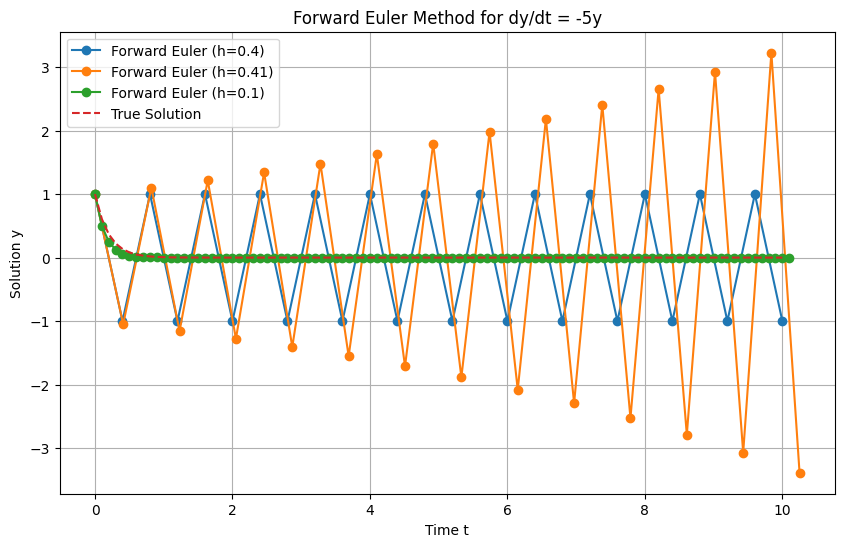

In [69]:
def ForwardEuler(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    
    t = t0
    y = y0
    
    while t < tf:
        y = y + h * f(t, y)
        t = t + h
        
        t_values.append(t)
        y_values.append(y)
    
    return t_values, y_values

f = lambda t, y: -5 * y
true_sol = lambda t: np.exp(-5 * t)

# for t, y in zip(T, Y):
#     print(f"t: {t:.2f}, y: {y:.6f}")

plt.figure(figsize=(10, 6))
hs = [0.4, 0.41, 0.1]
for h in hs:
    T, Y = ForwardEuler(f, 1, 0, 10, h)
    plt.plot(T, Y, marker='o', label=f'Forward Euler (h={h})')
    error = np.abs(true_sol(np.array(T)) - np.array(Y))
    print(f"Max error for h={h}: {np.max(error)}")
    # plt.plot(T, error, marker='x', linestyle='--', label=f'Error (h={h})')
plt.plot(np.linspace(0, 10, 100), true_sol(np.linspace(0, 10, 100)), label='True Solution', linestyle='--')
plt.title("Forward Euler Method for dy/dt = -5y")
plt.xlabel("Time t")
plt.ylabel("Solution y")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


## Observation
We can see that for forward Euler method, the solution converges if $-1<1-5h<1 \Rightarrow 0<h<0.4$.

# Question 1(b):
Use backward Euler method to solve $$y^\prime=5y, \quad y(0)=1.$$ Solve the problem for $t\in[0, 10]$ with $h=0.4$, $h=0.41$ and $h=0.1$.

Backward Euler method gives us that:
$$u_{n+1} = u_n + hf(t_{n+1}, u_{n+1})$$
In this question, that is:
$$u_{n+1} = u_n + 5hu_{n+1} \Rightarrow u_{n+1} = \dfrac{1}{1-5h}u_n$$

Max error for h=0.4: 5.184705528587146e+21
Max error for h=0.41: 1.8096400428217492e+22


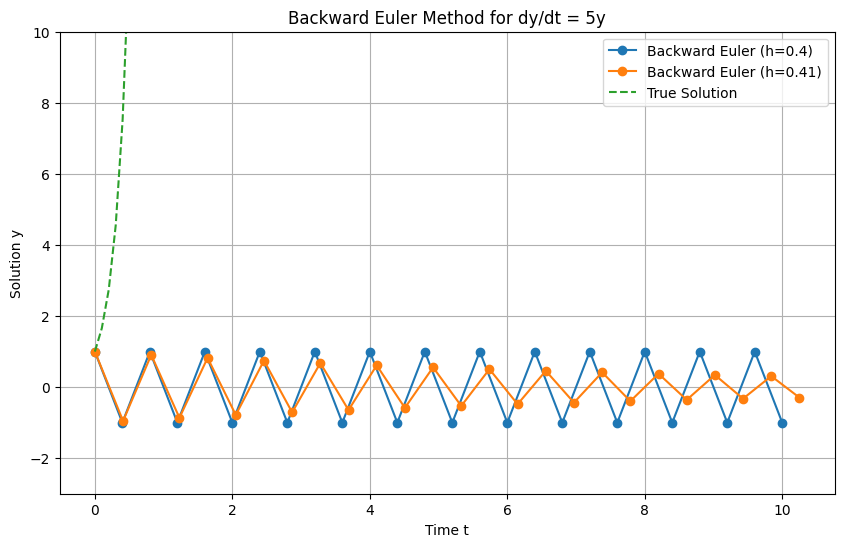

Max error for h=0.1: 2.5353011919083244e+30


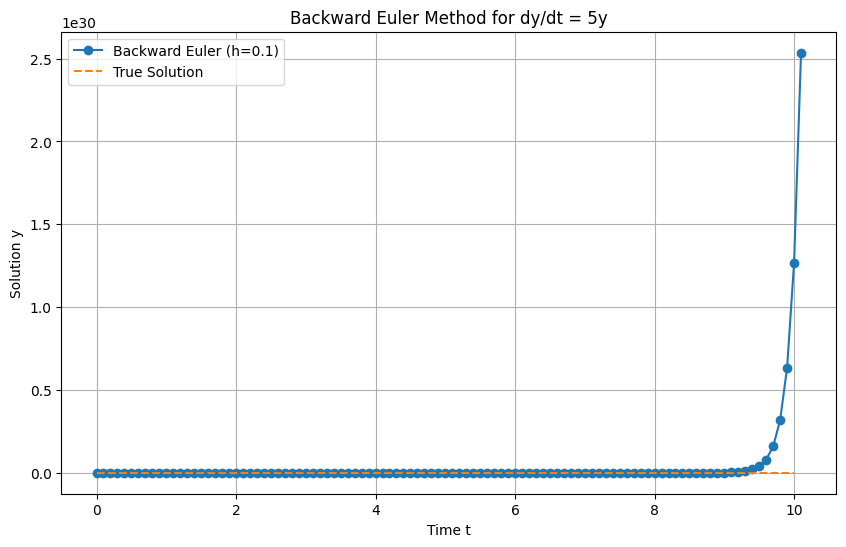

In [70]:
def BackwardEuler(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < tf:
        
        y = y / (1-5*h)
        t = t + h

        t_values.append(t)
        y_values.append(y)
    
    return t_values, y_values

f = lambda t, y: 5 * y
true_sol = lambda t: np.exp(5 * t)

# for t, y in zip(T, Y):
#     print(f"t: {t:.2f}, y: {y:.6f}")

plt.figure(figsize=(10, 6))
hs = [0.4, 0.41]
for h in hs:
    T, Y = BackwardEuler(f, 1, 0, 10, h)
    plt.plot(T, Y, marker='o', label=f'Backward Euler (h={h})')
    error = np.abs(true_sol(np.array(T)) - np.array(Y))
    print(f"Max error for h={h}: {np.max(error)}")
    # plt.plot(T, error, marker='x', linestyle='--', label=f'Error (h={h})')
plt.plot(np.linspace(0, 10, 100), true_sol(np.linspace(0, 10, 100)), label='True Solution', linestyle='--')
plt.title("Backward Euler Method for dy/dt = 5y")
plt.xlabel("Time t")
plt.ylabel("Solution y")
plt.ylim(-3, 10)
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


# Now try with h=0.1
h = 0.1
T, Y = BackwardEuler(f, 1, 0, 10, h)
plt.figure(figsize=(10, 6))
plt.plot(T, Y, marker='o', label=f'Backward Euler (h={h})')
error = np.abs(true_sol(np.array(T)) - np.array(Y))
print(f"Max error for h={h}: {np.max(error)}")
# plt.plot(T, error, marker='x', linestyle='--', label=f'Error (h={h})')
plt.plot(np.linspace(0, 10, 100), true_sol(np.linspace(0, 10, 100)), label='True Solution', linestyle='--')
plt.title("Backward Euler Method for dy/dt = 5y")
plt.xlabel("Time t")
plt.ylabel("Solution y")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


## Observation
We can see that for $|\dfrac{1}{1-5h}|<1 \Rightarrow h>0.4$, the solution converges to $0$ but it's totally different with the real solution.

While when we choose small $h$, the solution tends to be increasing but not the behavior with exponential function $e^{5t}$

# Question 2
Consider solving the following problem using forward Euler method $$y^\prime=y(1-y), \quad y=y_0, \quad 0<y_0<1.$$ Find the range of $h$ such that the solution is qualitatively correct.

This ODE has exact solution:
$$y=\dfrac{-Ce^t}{1-Ce^t}=\dfrac{1}{1+\tilde{C}e^{-t}}\quad, \text{ where } \tilde{C}=1+\dfrac{1}{y_0}$$
By Forward Euler we have the numerical recurrence relation:
$$u_{n+1}=u_n+hu_n(1-u_n)$$


Max error for h=0.2 with y0=0.01: 0.5502433840655336
Max error for h=0.5 with y0=0.01: 0.6132242019162455
Max error for h=1.0 with y0=0.01: 0.683770115353942
Max error for h=1.02 with y0=0.01: 0.6889868988559011
Max error for h=0.2 with y0=0.2: 0.23810498870777735
Max error for h=0.5 with y0=0.2: 0.22187670128921833
Max error for h=1.0 with y0=0.2: 0.18858187191454956
Solution became non monotonic increasing for h=1.02 with y0=0.2
Max error for h=1.02 with y0=0.2: 0.1876423188420438
Max error for h=0.2 with y0=0.5: 0.5427435880439492
Max error for h=0.5 with y0=0.5: 0.548376895998601
Max error for h=1.0 with y0=0.5: 0.5518496877050684
Solution became non monotonic increasing for h=1.02 with y0=0.5
Max error for h=1.02 with y0=0.5: 0.5536527591100369
Max error for h=0.2 with y0=0.8: 0.7419341856630315
Max error for h=0.5 with y0=0.8: 0.74965312655602
Max error for h=1.0 with y0=0.8: 0.7618496877050683
Solution became non monotonic increasing for h=1.02 with y0=0.8
Max error for h=1.02 w

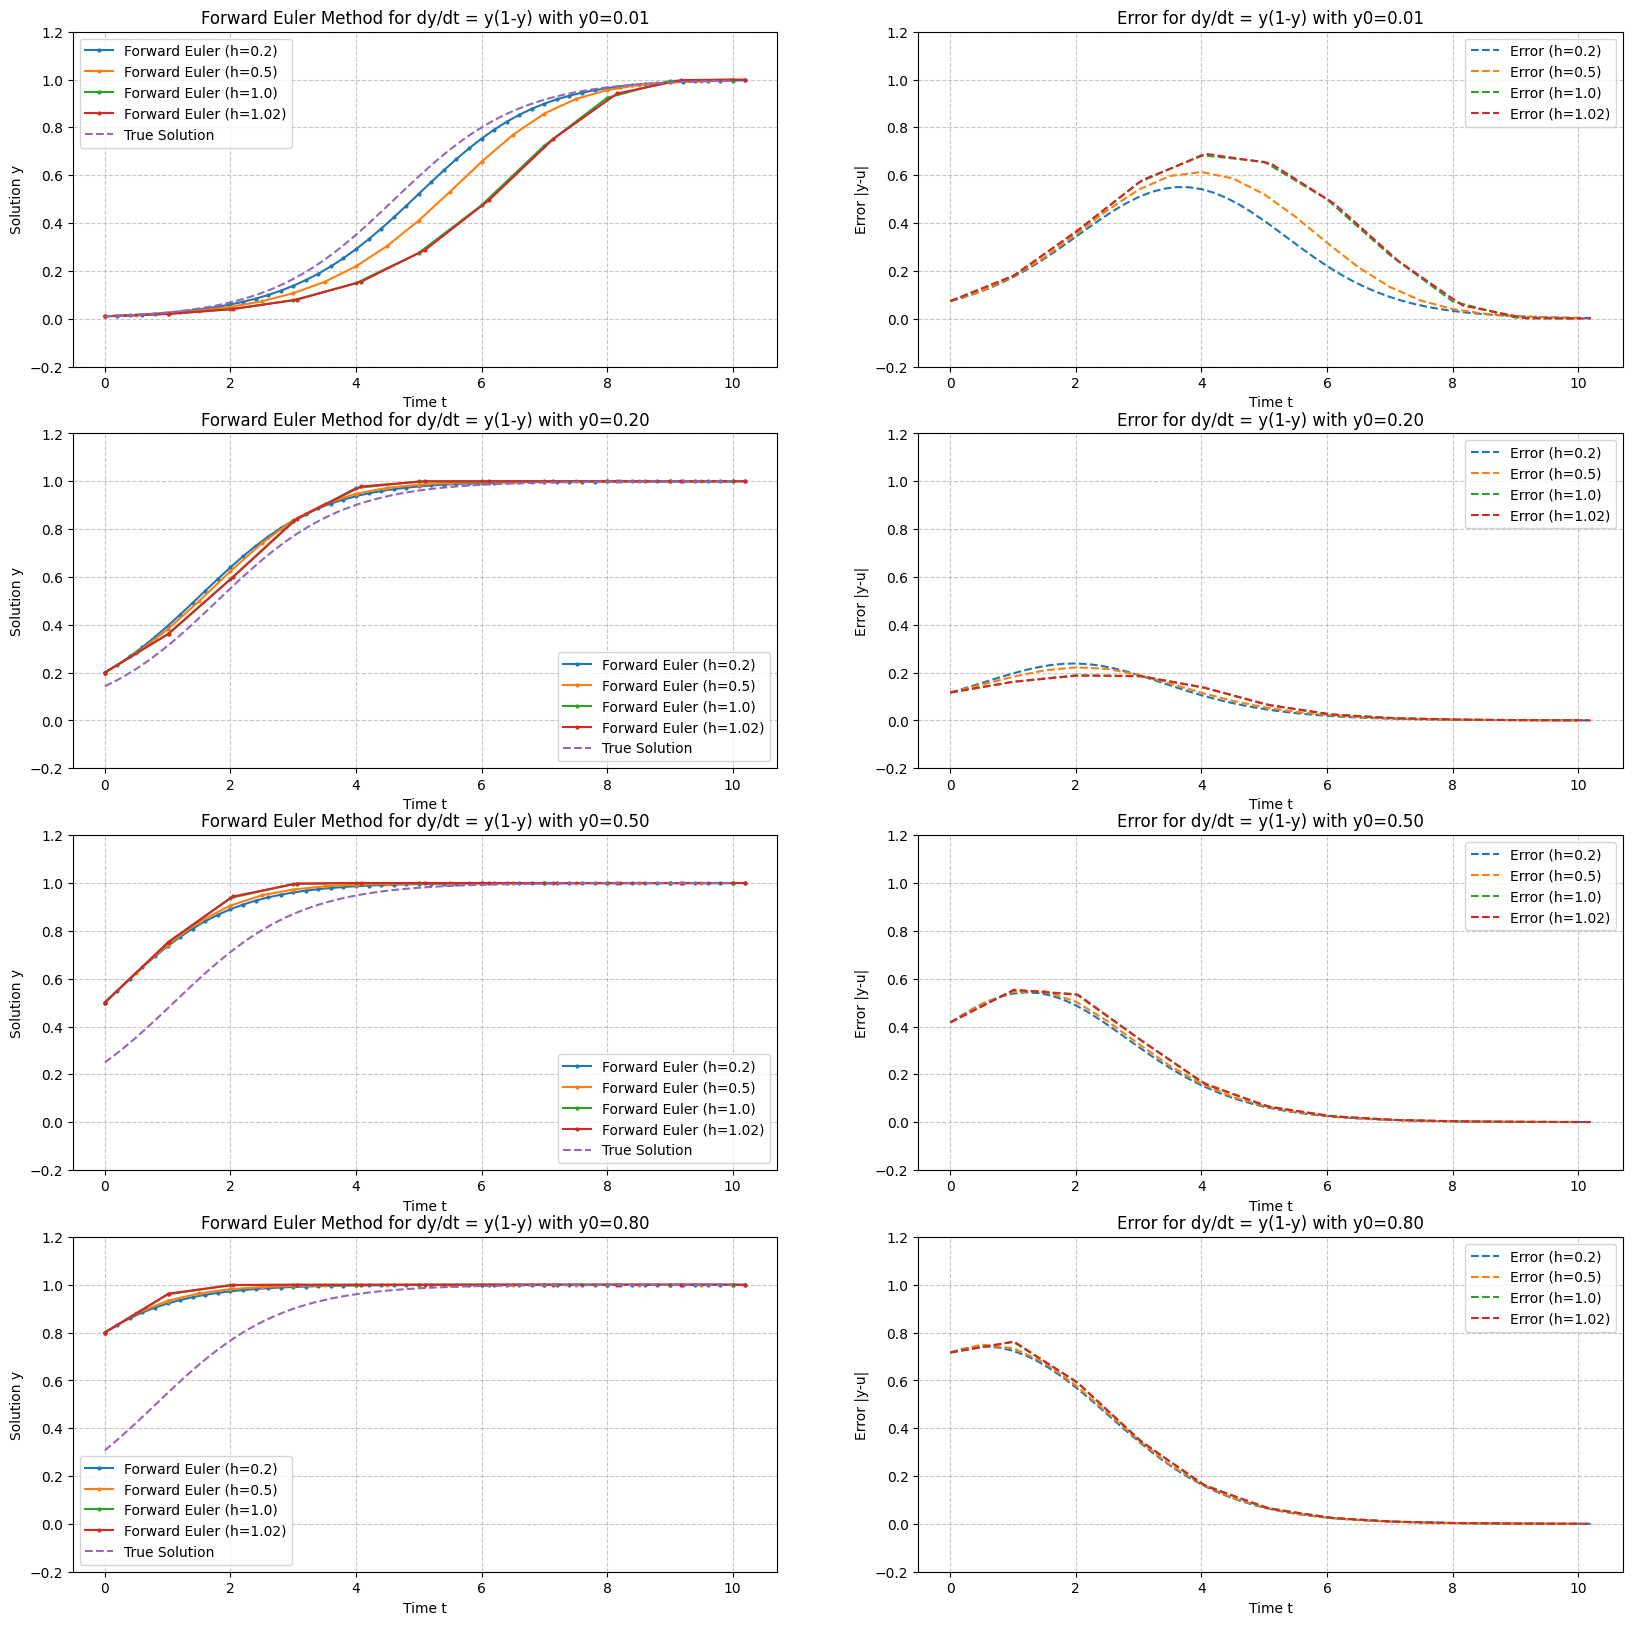

In [71]:
def ForwardEuler(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    
    t = t0
    y = y0
    
    while t < tf:
        y = y + h * f(t, y)
        t = t + h
        
        t_values.append(t)
        y_values.append(y)
    
    return t_values, y_values

f = lambda t, y: y * (1-y)
def true_sol(t, y0 = 0.1):
    return 1 / (1 + (1+1/y0) * np.exp(-1*t))

fig, ax = plt.subplots(4, 2, figsize=(20, 20), sharey=True)
hs = [0.2, 0.5, 1.0, 1.02]
y0s = [0.01, 0.2, 0.5, 0.8]
for y0, i in zip(y0s, range(4)):
    for h in hs:
        if h == 0: 
            continue
        else:
            T, Y = ForwardEuler(f, y0, 0, 10, h)
            for l in range(len(Y)-1):
                if Y[l+1] < Y[l]:
                    print(f"Solution became non monotonic increasing for h={h} with y0={y0}")
                    break
            ax[i][0].plot(T, Y, marker='o', markersize=2, label=f'Forward Euler (h={h})')
            ax[i][0].grid(True)
            error = np.abs(true_sol(np.array(T)) - np.array(Y))
            print(f"Max error for h={h} with y0={y0}: {np.max(error)}")
            ax[i][1].plot(T, error, linestyle='--', label=f'Error (h={h})')
    print('===========================================')
    ax[i][1].tick_params(labelleft=True, left=True)
    ax[i][0].plot(np.linspace(0, 10, 100), true_sol(np.linspace(0, 10, 100), y0), label='True Solution', linestyle='--')
    ax[i][0].set_title(f"Forward Euler Method for dy/dt = y(1-y) with y0={y0:.2f}")
    ax[i][1].set_title(f"Error for dy/dt = y(1-y) with y0={y0:.2f}")
    ax[i][0].set_xlabel("Time t")
    ax[i][0].set_ylabel("Solution y")
    ax[i][1].set_xlabel("Time t")
    ax[i][1].set_ylabel("Error |y-u|")
        
plt.ylim(-0.2,1.2)
# plt.yscale('log')
for ax in ax.flat:
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend()

plt.show()


## Observation
If we want the numerical solution be qulatatively correct, $u_n$ must satisfiy:
* $u_n\in[0, 1] \Rightarrow u_{n+1}\in[0,1]$
* $u_n<u_{n+1}$
* $u_n \to 1$ as time goes to infinity

We can observe that in general that when $h\le 1$ then the solution would satisfy all the conditions above. If $h$ is slightly greater than 1, solution may have oscillation depending on initial value $y_0$.